In [1]:
import numpy as np
import sympy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt

%matplotlib inline

## Sympy can be used to check your calculus

A simple derivative example

In [2]:
# instantiate symbol first
x = sympy.symbols('x')
# take derivative
sympy.diff(x**3)

3*x**2

In [3]:
# indefinite integral
sympy.integrate(3*x**2)

x**3

In [4]:
# definite integral
sympy.integrate(3*x**2, (x, 0, 1))

1

A gradient

In [5]:
m = sympy.Matrix(sympy.symbols('a b'))

In [6]:
m

Matrix([
[a],
[b]])

In [7]:
#for reference...this is what this looks like...
m*m.T

Matrix([
[a**2,  a*b],
[ a*b, b**2]])

In [8]:
[sympy.diff(sum(m*m.T), i) for i in m]

[2*a + 2*b, 2*a + 2*b]

## Gradient Descent in one dimension

Let's start with an overly simplified example, a cost function of $ y = 3x^2 $

In this case, 'x' is our parameter that we are trying to minimize. 

First, you'll need to write a function that computes the gradient of the cost function at a given x.

In [9]:
def cost_func(x):
    return 3*x**2

def grad_cost_func(x):
    return 6*x

We know from calculus that we can find the minimum of this function at x = 0. 

For demonstation purposes, we pretend that we don't know this, and we will start with a guess of x = 5 for the minimum. :)

Let's plot this, for a visual...

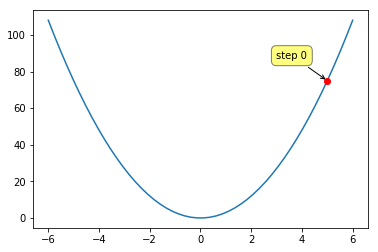

In [10]:
# keeping our guesses in a list for reasons that will become clear later....
guesses = [5]

def plot_cost(x_guess):
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    x = np.linspace(-6, 6)
    y = cost_func(x)
    ax.plot(x, y)
    y_guess = [cost_func(xg) for xg in x_guess]
    ax.plot(x_guess, y_guess, 'ro')
    
    labels = ['step {}'.format(i) for i in range(len(x_guess))]
    for label, x, y in zip(labels, x_guess, y_guess):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

   
plot_cost(guesses)

In this one-dimensional case, we can visually inspect and see that we are pretty far from the minimum! 

Let's compute the gradient at this point to update our "guess" for x 

In [11]:
grad = grad_cost_func(guesses[-1])
grad

30

The gradient is huge at our guess! If we simply adjusted by that amount, we would overshoot the minimum by far! This is why we use the learning rate to adjust our guess by small steps. Let's try a learning rate of .05, so we don't go too far. Since we are doing gradient DESCENT, we should subtract the gradient from our guess. 

In [12]:
learning_rate = 0.05
guess_update = guesses[-1] - learning_rate*grad
guesses.append(guess_update)

print(guesses)

[5, 3.5]


Plot including our new guess...

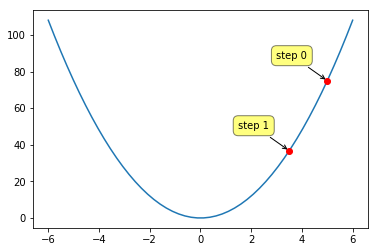

In [13]:
plot_cost(guesses)

That's a lot closer. Let's do this three more times and see where we land...

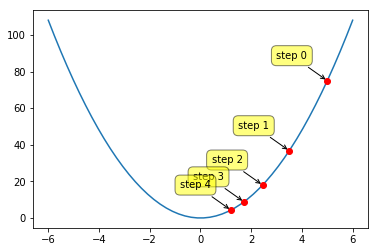

In [14]:
for _ in range(3):
    grad = grad_cost_func(guesses[-1])
    guess_update = guesses[-1] - learning_rate*grad
    guesses.append(guess_update)

plot_cost(guesses)

Note that as we get closer to the minimum, the gradient gets smaller and so the guesses step more slowly. This is a good thing - a natural property that makes it harder for us to overshoot!

Let's see if 5 more times does the job.

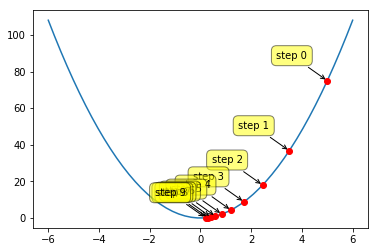

In [15]:
for _ in range(5):
    grad = grad_cost_func(guesses[-1])
    guess_update = guesses[-1] - learning_rate*grad
    guesses.append(guess_update)

plot_cost(guesses)

looks pretty close, let's inspect the list to see

In [16]:
print(guesses)

[5, 3.5, 2.45, 1.715, 1.2005, 0.8403499999999999, 0.5882449999999999, 0.41177149999999996, 0.28824004999999997, 0.20176803499999996]


Didn't quite get to the minimum. It is left as an exercise to the reader to determine how many more steps it will take to get to the bottom.

## Now, let's deal with some real cost functions

### Linear Regression

$$ J(\theta) = \frac{1}{2}\sum_{i=1}^N (y_i - h_\theta(x_i))^2 $$

### Logistic Regression

$$ \ln p(\vec{y}|X;\theta) = \sum_{i=1}^N (y_i \ln h_\theta (x_i) + (1- y_i)\ln(1- (h_\theta (x_i))) $$


In your assignment, you will be working through the gradient descent algorithm for logistic regression. Let's work through an example using a linear regression. 

First, we'll instantiate a small "dataset" X, with 2 features and 10 rows, and some beta coefficients. 

In [17]:
X = np.random.random((10, 2))
true_betas = np.array([3, 4]).reshape(-1, 1) # go ahead and turn this into a column vector 

Now, when doing gradient descent, we know our Xs and ys, but are actually trying to solve for the best values of beta. So we need to calculate the y that we will use  

Note - we already know the correct answer for our coefficients, which is a good way to practice our algorithm - we already know the correct answer! Note that since there does exist a set of betas that X dot beta is exactly y, we expect this to converge absolutely.


In [18]:
y = X.dot(true_betas).reshape(-1, 1) # keep this as a column vector so linear algebra goes smoothly
print(y)

[[3.30070727]
 [0.90336392]
 [5.81497088]
 [3.89649337]
 [4.75415664]
 [0.80212137]
 [2.81121284]
 [3.08924414]
 [5.56267556]
 [3.73827612]]


##  Reminder: Gradient Formula
* The gradient is the multivariate analogue of the derivative.
    * More precisely, it's the length $n$ vector of partial derivatives where $ f: \mathbb{R}^n \rightarrow \mathbb{R} $.
* Geometrically the gradient is the direction of steepest descent.

$$ \nabla f = \sum_{i=1}^P\frac{\partial f}{\partial x_i} e_i$$

How can we use the direction of steepest descent to find the minimum of our function?

How about the maximum?

### Steps for Gradient Descent

**1. Compute objective function.** We've done this. We are doing a linear regression, so we will use the sum of squared errors as our cost function. 
$$ J(\theta) = \frac{1}{2}\sum_{i=1}^N (y_i - h_\theta(x_i))^2 $$

**2. Compute gradient of objective function.** Compute the gradient of this below. You may find it helpful to break this into components, i.e.
$$ J(\theta) = \frac{1}{2}(y_1 - x_1\beta_1 - x_2\beta_2)^2 $$
but you should return the matrix formulation. 

Put the gradient in a function that will return the gradient vector for given X, betas, and y. This vector should have the same shape as your coefficient array!

Remember the product and chain rules!

In [19]:
def sse_grad_func(X, beta_guess, y):
    return -X.T.dot((y - X.dot(beta_guess)))

Now, in practice, we won't know our coefficients, so we'll need to start with a "random guess"...

In [20]:
beta_guess = np.ones((2,1))

### Visualize the cost function. 

Note that this cost function is very smooth and does have an absolute minimum, because of the way we set the problem up. "Real" cost functions will lack this feature

In [ ]:
def cost_func_surface(betas):
    return 0.5*((y - X.dot(betas))**2).sum()

def plot_cost_surface():
    beta1_space = np.linspace(-10, 10).reshape(-1, 1)
    beta2_space = np.linspace(-10, 10).reshape(-1, 1)
    
    cost_surface_z = [cost_func_surface(np.array([beta1, beta2]).reshape(-1, 1)) for beta1 in beta1_space for beta2 in beta2_space] 

    beta1_space, beta2_space = np.meshgrid(beta1_space, beta2_space)

    cost_surface_z = np.array(cost_surface_z).reshape(50,50)
    
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='3d'))

    ls = LightSource(270, 45)
    # To use a custom hillshading mode, override the built-in shading and pass
    # in the rgb colors of the shaded surface calculated from "shade".
    rgb = ls.shade(cost_surface_z, cmap=cm.rainbow, vert_exag=0.1, blend_mode='soft')

    surf = ax.plot_surface(beta1_space, beta2_space, cost_surface_z, facecolors=rgb)
    ax.set_xlabel('beta 1')
    ax.set_ylabel('beta 2')
    ax.set_zlabel('cost')

    
plot_cost_surface()    

### Steps for Gradient Descent

**3. Adjust weights/parameters by the gradient of the cost function scaled by the learning rate** We should update our betas given the gradient of the cost function that we just computed, scaled by our learning rate. This is gradient DESCENT, so we should subtract our update. 

Write a function that performs a parameter update and returns updated parameters (This is very simple - should be a one liner, use numpy. DO NOT OVERTHINK THIS!). Since our problem is simple, the default learning rate is (relatively) high at 0.02.

In [ ]:
def paramater_update(betas_old, grad, lr=0.02):
    return betas_old - lr*grad

Do one update step on our parameters...

In [ ]:
grad = sse_grad_func(X, beta_guess, y)

beta_1_iter = paramater_update(beta_guess, grad)

print('New values of beta after 1 update: {}'.format(beta_1_iter))

### Put it all together! 

If you have done your math right, this should be a step in the right direction. But it takes some iterating to get to the correct answer. 

Write a function with a for loop below to perform the full gradient descent. Experiment with values of max_iter to see how long it takes to converge to the correct parameters

In [ ]:
def simple_gradient_descent(X, y, beta_guess = np.ones((2,1)), lr = .02, max_iter = 100):
    betas = beta_guess
    for _ in range(max_iter):
        grad = sse_grad_func(X, betas, y)
        betas = paramater_update(betas, grad, lr = lr)
    return betas

simple_gradient_descent(X, y, max_iter=2000) # remember, the correct answer should be: array([[3], [4]])

### Extra Credit: Gradient Descent Convergence Criterion
We did the simplest case of convergence criteria, a set number of iterations. In practice, you would want to use a more sophisticated convergence criterion - i.e. stopping iterations when your result stops significantly improving.

Copy and paste your function from into two blocks below, and improve by adding the following stopping criteria in addition to maximum iterations. Feel free to adjust the default paramaters if you don't like the results!

* Change in cost function $ (cost_{old} - cost_{new}) / cost_{old} < \epsilon $
* Magnitude of gradient < $ \epsilon $


In [ ]:
# this one requires a helper function of the cost function 
def cost_fcn(X, betas, y):
    return 0.5*((y - X.dot(betas))**2).sum()

def gradient_descent_cost_fcn(X, y, beta_guess = np.ones((2,1)), lr = .02, max_iter = 1000, epsilon = 1e-6):
    betas = beta_guess
    cost_fcn_current = cost_fcn(X, betas, y)
    for _ in range(max_iter):
        grad = sse_grad_func(X, betas, y)
        betas = paramater_update(betas, grad, lr = lr)
        cost_fcn_new = cost_fcn(X, betas, y)
        if abs(cost_fcn_current - cost_fcn_new) < epsilon: 
            print('converged on iteration {}'.format(_))
            return betas 
        cost_fcn_current = cost_fcn_new
    return betas

gradient_descent_cost_fcn(X, y)

In [ ]:
def gradient_descent_grad_mag(X, y, beta_guess = np.ones((2,1)), lr = .02, max_iter = 1000, epsilon = .01):
    betas = beta_guess
    for _ in range(max_iter):
        grad = sse_grad_func(X, betas, y)
        if np.linalg.norm(grad) < epsilon:
            print('converged on iteration {}'.format(_))
            return betas
        betas = paramater_update(betas, grad, lr = lr)
    return betas

gradient_descent_grad_mag(X, y, epsilon=.0001)